In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
path = "../../All_data_sets/model_data_set/k_means_clustering/Mall_Customers.csv"

In [4]:
df = pd.read_csv( path )

df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### Rename the columns

In [5]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [6]:
cols = {
    'CustomerID':"cust_id", 
    'Gender':'gender', 
    'Age':"age", 
    'Annual Income (k$)':"income_k$",
    'Spending Score (1-100)':'spending_score'
}

In [7]:
df.rename(columns=cols , inplace=True)
df.head()

,cust_id,gender,age,income_k$,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [8]:
df.shape

(200, 5)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   cust_id         200 non-null    int64 
 1   gender          200 non-null    object
 2   age             200 non-null    int64 
 3   income_k$       200 non-null    int64 
 4   spending_score  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [10]:
df.isnull().sum()

cust_id           0
gender            0
age               0
income_k$         0
spending_score    0
dtype: int64

### Columns cust_id	gender	age	are not required for grouping

In [11]:
df.drop( columns=["cust_id","gender","age"] ,axis =1, inplace=True )

df.head()

,income_k$,spending_score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


### scale the data

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [13]:
scaler = StandardScaler()

In [14]:
X_train = df.iloc[ 0:151 , : ]
X_test = df.iloc[ 151: , : ]

In [15]:
X_train_scale = scaler.fit_transform( X_train )

X_test_scale = scaler.fit_transform( X_test )

In [16]:
from sklearn.cluster import KMeans

In [17]:
wcss = []

In [18]:
for k in range(2,11):
    model = KMeans(n_clusters=k,init='k-means++')
    model.fit(X_train_scale)
    wcss.append( model.inertia_ )

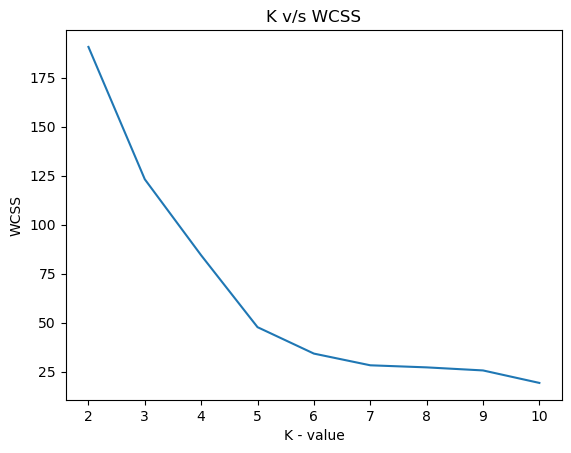

In [19]:
plt.plot( range(2,11) , wcss  )
plt.title("K v/s WCSS")
plt.xlabel('K - value')
plt.ylabel("WCSS")
plt.show()

### from the plot we can conclude that k = 5 is best

In [20]:
knn =  KMeans(n_clusters=5,init='k-means++')
knn.fit(X_train_scale)

KMeans(n_clusters=5)

In [21]:
y_test_pred = knn.predict(X_test_scale)

In [22]:
y_train_pred = knn.predict(X_train_scale)

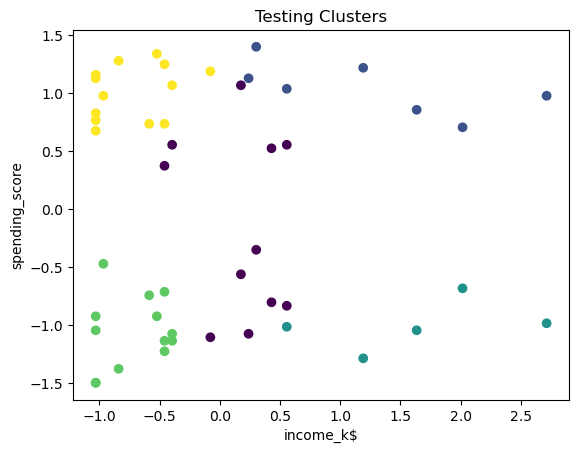

In [23]:
plt.scatter( X_test_scale[ : ,0] , X_test_scale[ : ,1] , c = y_test_pred )
plt.title("Testing Clusters")
plt.xlabel('income_k$')
plt.ylabel("spending_score")
plt.show()

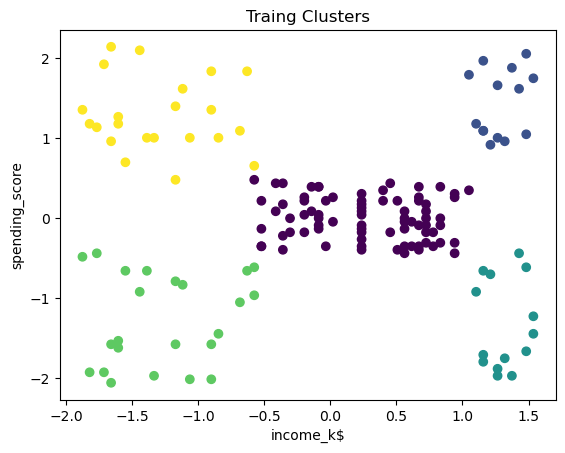

In [24]:
plt.scatter( X_train_scale[ : ,0] , X_train_scale[ : ,1] , c = y_train_pred )
plt.title("Traing Clusters")
plt.xlabel('income_k$')
plt.ylabel("spending_score")
plt.show()